# Gathering data

install tweepy package as input in command：pip install tweepy

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

##### 1. The WeRateDogs Twitter archive named as twitter_archive_enhanced.csv

In [2]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

In [3]:
response = requests.get(url)
with open('twitter-archive-enhanced.csv','wb') as file:
    file.write(response.content)

In [2]:
twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1988,672834301050937345,NaN,NaN,2015-12-04 17:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Ed. He's not mad, just disappointed. 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672834301...,10,10,Ed,None,None,None,None
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None
1517,690938899477221376,NaN,NaN,2016-01-23 16:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","She thought the sunset was pretty, but I thoug...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690938899...,10,10,None,None,None,None,None


In [4]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### 2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
response = requests.get(url)
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [6]:
image_predictions=pd.read_table('image-predictions.tsv',sep='\t')

In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


##### 3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) <font color=blue>tweet ID, retweet count, and favorite count</font>. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [9]:
import tweepy

In [13]:
consumer_key = 'xxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxx'
access_token = 'xxxxxxxxxx'
access_secret = 'xxxxxxxxxxx'

In [14]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [11]:
n=0
for id in twitter_archive_enhanced.tweet_id:
    n=n+1
    print(n)
    try:
        tweet=api.get_status(id, tweet_mode='extended')._json
        with open('tweet_json.txt','a') as outfile:
            json.dump(tweet,outfile)
            outfile.write("\n")
    except:
        TweepError:'No data available for specified ID.'
        print('not data available for this ID')         

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
not data available for this ID
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
not data available for this ID
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
not data available for this ID
120
121
122
123
124
125
126
127
128
129
130
131
132
133
not data available for this ID
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
not data available for this ID
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
2

1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
not data available for this ID
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974

json.dumps(obj, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
Serialize obj to a JSON formatted str using this conversion table. The arguments have the same meaning as in dump().


*<font color=grey>Note:Writing and Reading Twitter JSON </font>  
After querying each tweet ID, you will write its JSON data to the required tweet_json.txt file with each tweet's JSON data on its own line. You will then read this file, line by line, to create a pandas DataFrame that you will soon assess and clean. This Reading and Writing JSON to a File in Python article from Stack Abuse, will be useful.*

*<font clor=grey>Note:Twitter's Rate Limit   
Twitter's API has a rate limit. Rate limiting is used to control the rate of traffic sent or received by a server. As per Twitter's rate limiting info page:   
Rate limits are divided into 15 minute intervals   
To query all of the tweet IDs in the WeRateDogs Twitter archive, 20-30 minutes of running time can be expected.    Printing out each tweet ID after it was queried and using a code timer were both helpful for sanity reasons. Setting the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class is useful as well.*

In [8]:
#import re

In [9]:
#创建一个空列表，df_list,并附加字典
#df_list=[]
#with open('tweet_json.txt','r') as file:
#    for line in file:
#        text=file.readline()
#        tweet_id = re.findall(r", \"id\": (.+?),",text)[0]
#        tweet_id=int(tweet_id)
#        retweet_count = re.findall(r"\"retweet_count\": (.+?),",text)[0]
#        retweet_count=int(retweet_count)
#        favorite_count = re.findall(r"\"favorite_count\": (.+?),",text)[0]
#        favorite_count=int(favorite_count)
#        df_list.append({'tweet_id':tweet_id,
#                        'retweet_count':retweet_count,
#                        'favorite_count':favorite_count})
#        twitter_retweet_favorite=pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])   
    

In [10]:
#tweet_json里面一条数据都是以字典的形式储存，用json.loads来读取将字符串转成字典
#然后提取里面需要的数据，然后append到list或者直接append到dataframe
tweet_list=[]
with open('tweet_json.txt','r') as f:
    for row in f:
        json_dict=json.loads(row)
        to_append={
            'tweet_id':json_dict['id'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
            }
        tweet_list.append(to_append)
twitter_retweet_favorite=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [11]:
twitter_retweet_favorite.sample(5)

,tweet_id,retweet_count,favorite_count
2161,669214165781868544,180,463
2022,671729906628341761,4681,8953
906,756651752796094464,1483,5530
1945,673576835670777856,604,1450
431,819924195358416896,5488,14061


In [12]:
twitter_retweet_favorite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


# Assessing Data

 After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [13]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 - 错误的数据类型(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id）,应该是int64
 - 错误的数据类型(timestamp,retweeted_status_timestamp)，应该是时间类型
 - 错误的数据类型(doggo,floofer,pupper,puppo)，应该是category类型

In [15]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#检查是否有重复的tweet_id
twitter_archive_enhanced.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [17]:
#查看doggo的值分布
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
#查看狗的地位为doggo的记录其文本是否包含doggo
twitter_archive_enhanced[twitter_archive_enhanced.doggo=='doggo'].text.str.contains('doggo',case=False).value_counts()

True    97
Name: text, dtype: int64

In [19]:
#查看狗的地位不为doggo的记录其文本是否有包含doggo的
twitter_archive_enhanced[twitter_archive_enhanced.doggo=='None'].text.str.contains('doggo',case=False).value_counts()

False    2249
True       10
Name: text, dtype: int64

In [20]:
twitter_archive_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
#查看狗的地位为floofer的记录其文本是否包含floofer
twitter_archive_enhanced[twitter_archive_enhanced.floofer=='floofer'].text.str.contains('floofer',case=False).value_counts()

True    10
Name: text, dtype: int64

In [22]:
#查看狗的地位不为floofer的记录其文本是否有包含floofer的
twitter_archive_enhanced[twitter_archive_enhanced.floofer=='None'].text.str.contains('floofer',case=False).value_counts()

False    2346
Name: text, dtype: int64

In [23]:
twitter_archive_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
#查看狗的地位为pupper的记录其文本是否包含pupper
twitter_archive_enhanced[twitter_archive_enhanced.pupper=='pupper'].text.str.contains('pupper',case=False).value_counts()

True    257
Name: text, dtype: int64

In [25]:
#查看狗的地位不为pupper的记录其文本是否有包含pupper的
twitter_archive_enhanced[twitter_archive_enhanced.pupper=='None'].text.str.contains('pupper',case=False).value_counts()

False    2073
True       26
Name: text, dtype: int64

In [26]:
twitter_archive_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [27]:
#查看狗的地位为puppo的记录其文本是否包含puppo
twitter_archive_enhanced[twitter_archive_enhanced.puppo=='puppo'].text.str.contains('puppo',case=False).value_counts()

True    30
Name: text, dtype: int64

In [28]:
#查看狗的地位不为puppo的记录其文本是否有包含puppo的
twitter_archive_enhanced[twitter_archive_enhanced.puppo=='None'].text.str.contains('puppo',case=False).value_counts()

False    2318
True        8
Name: text, dtype: int64

In [29]:
#查看twitter文本不包含doggo，floofer，pupper，puppo的记录，检查是否有地位的缩写或者其他拼法
for x in twitter_archive_enhanced.text:
    if (x.lower().find('doggo')==-1 and x.lower().find('floofer')==-1 and x.lower().find('pupper')==-1 and x.lower().find('puppo')==-1):
        print(x)


This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

Never seen a shark hold another shark like this before. Must be evolving. Both 10/10 please only send dogs though https://t.co/x4IUNKV79Y
This is Linus. He just wanted to say hello but no one's paying attention. 12/10 (vid by @rebeccacollinzz) https://t.co/VCijm2eVpR
This is Atticus. He's remaining calm but his costume looks terrified. 11/10 https://t.co/uT7QeZI34U
This is Clark. He's deadly af. Clearly part shark (see pic 2). 10/10 would totally still try to pet https://t.co/dmdEBOEctC
Guys... I said DOGS with "shark qualities" or "costumes." Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
Guys... Dog Jesus 2.0
13/10 buoyant af https://t.co/CuNA7OwfKQ
When you just can't resist... 10/10 topnotch tongue 

In [30]:
#查看twitter文本不包含doggo，floofer，pupper，puppo的记录，检查是否有doggo的其他写法
for x in twitter_archive_enhanced.text:
    if (x.lower().find('doggo')==-1 and x.lower().find('floofer')==-1 and x.lower().find('pupper')==-1 and x.lower().find('puppo')==-1):
        if x.lower().find('dogg')!=-1:
            print(x)

This is Waffles. His doggles are pupside down. Unsure how to fix. 13/10 someone assist Waffles https://t.co/xZDA9Qsq1O
This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) https://t.co/Nx52PGwH94
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444
HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOOD DOGGI ALL THE TIME MISTAKES HAPPEN 13/10
https://t.co/G2ms0A5jWM
Atlas is back and this time he's got doggles. Still 13/10 solarly conscious af https://t.co/s7MgFWDySc
We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy  https://t.co/pmarb2dG0e
This is Leonidas. He just got rekt by a snowball. 9/10 doggy down https://t.co/uNrmYDUa9M
After so many requests... here you go.

Good dogg. 420/10 https://t.

In [31]:
#查看twitter文本不包含doggo，floofer，pupper，puppo的记录，检查是否有floofer的其他写法
for x in twitter_archive_enhanced.text:
    if (x.lower().find('doggo')==-1 and x.lower().find('floofer')==-1 and x.lower().find('pupper')==-1 and x.lower().find('puppo')==-1):
        if x.lower().find('flo')!=-1:
            print(x)

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ
This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr
This is Marlee. She fetched a flower and immediately re

In [32]:
#查看twitter文本不包含doggo，floofer，pupper，puppo,但包含flop，或floof的记录
for x in twitter_archive_enhanced.text:
    if (x.lower().find('doggo')==-1 and x.lower().find('floofer')==-1 and x.lower().find('pupper')==-1 and x.lower().find('puppo')==-1):
        if (x.lower().find('flop')!=-1 or x.lower().find('floof')!=-1):
            print(x)

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
Unbelievable... We. Only. Rate. Dogs. Please stop sending in other things like this Blossoming Flop Kangaroo. Thank you... 11/10 https://t.co/EeeErAbso0
We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL
RT @dog_rates: This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionate…
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
This is Kyro. He's a Stratocumulus Flop. Tong

In [33]:
#查看twitter文本不包含doggo，floofer，pupper，puppo的记录，检查是否有pupper或puppo的其他写法
for x in twitter_archive_enhanced.text:
    if (x.lower().find('doggo')==-1 and x.lower().find('floofer')==-1 and x.lower().find('pupper')==-1 and x.lower().find('puppo')==-1):
        if x.lower().find('pupp')!=-1:
            print(x)

This is Rusty. He wasn't ready for the first pic. Clearly puppared for the second. 13/10 confirmed great boy https://t.co/tyER0KpdXj
RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe
This is Nelly. He really hopes you like his Hawaiian shirt. He already tore the tags off. 13/10 h*ck of a puppurchase https://t.co/LbkG5CiM7o
RT @dog_rates: This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.c…
This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj
Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 

In [34]:
#查看twitter文本包含有pupple的记录
for x in twitter_archive_enhanced.text:
    if (x.lower().find('pupple')!=-1):
        print(x)

Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e
This is Oreo. She's a photographer and a model. Living a double pupple life. 12/10 such talent much cute would pet https://t.co/zNeLxJeAoL


 - 狗的地位字段doggo，pupper，puppo都有值缺失
 - flop,floof应归为floofer
 - pupple应归为puppo

In [35]:
#察看名字的值分布，看是否有无效名字
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Buddy          7
Toby           7
Daisy          7
Bailey         7
Bella          6
Koda           6
Rusty          6
Jax            6
Leo            6
Milo           6
Oscar          6
Dave           6
Scout          6
Stanley        6
Jack           6
Bentley        5
            ... 
Joey           1
Kathmandu      1
Edgar          1
Tuco           1
Randall        1
Shikha         1
Rolf           1
Stu            1
Derby          1
Barry          1
Pinot          1
Andru          1
Corey          1
Poppy          1
Aqua           1
Simba          1
Sweets         1
Cuddles        1
Colin          1
O              1
Lorelei        1
Lassie         1
Stefan         1
Cal            1
Kollin         1
Ralphy         1
Mollie         1
Luther        

In [36]:
#察看名字排序结果，看是否有无效名字
twitter_archive_enhanced.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [37]:
#察看首字母非大写的名字，看其是否为无效名字
for x in twitter_archive_enhanced.name:
    if x[0].isupper()==False:
        print(x)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


In [38]:
#查看名字为None的文本，是否包含名字
for x  in twitter_archive_enhanced[twitter_archive_enhanced.name=='None'].text:
    print(x)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
Here we have a corgi undercover as a malamute. Pawbably doing impor

In [39]:
#查看名字为a的文本，是否包含名字
for x  in twitter_archive_enhanced[twitter_archive_enhanced.name=='a'].text:
    print(x)

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

In [40]:
#查看文本中name的写法
for x  in twitter_archive_enhanced[twitter_archive_enhanced.name=='None'].text:
    if x.lower().find('name')!=-1:
        print(x)

I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen
HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g
Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0
Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T
RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley
When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.c

- None，a, an, the,0,my,not,officially,old,one,quite,space,such,this,unacceptable,very,not,incredibly,mad,just,his,actually,getting,infuriating,life,light,by,all是无效名字
 - 有些名字是缺失或无效的，但在text中包含了狗的名字，如 named XXX,name is xxx,NAME. IS. XXX 

In [41]:
#查看评级分母的值分布
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [42]:
#查看评级分子的值分布
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [43]:
twitter_archive_enhanced.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [44]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [45]:
#查看评级分母不是10的记录的文本和评级分子
for x in twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator!=10].text:
    print(x)
    print(twitter_archive_enhanced[twitter_archive_enhanced.text==x].rating_numerator)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
313    960
Name: rating_numerator, dtype: int64
@docmisterio account started on 11/15/15
342    11
Name: rating_numerator, dtype: int64
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
433    84
Name: rating_numerator, dtype: int64
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
516    24
Name: rating_numerator, dtype: int64
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
784    9
Name: rating_numerator, dtype: int64
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
902    165
Name: rating_numerator, dtype: int64
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and

In [46]:
#查看评级分母是10的记录的文本和评级分子
for x in twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator==10].text:
    print(x)
    print(twitter_archive_enhanced[twitter_archive_enhanced.text==x].rating_numerator)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
0    13
Name: rating_numerator, dtype: int64
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
1    13
Name: rating_numerator, dtype: int64
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
2    12
Name: rating_numerator, dtype: int64
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
3    13
Name: rating_numerator, dtype: int64
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
4    12
Name: rating_numerator, dtype: int64
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin

Name: rating_numerator, dtype: int64
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
56    14
Name: rating_numerator, dtype: int64
Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC
57    12
Name: rating_numerator, dtype: int64
This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt
58    13
Name: rating_numerator, dtype: int64
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
59    12
Name: rating_numerator, dtype: int64
This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw
60    12
Name: rating_numerator, dtype: int64
Meet Jesse. He's 

137    12
Name: rating_numerator, dtype: int64
Meet Boomer. He's just checking pup on you. Hopes you had a good day. If not, he hopes he made it better. 13/10 extremely good boy https://t.co/pozUoHLkGg
138    13
Name: rating_numerator, dtype: int64
This is Sammy. Her tongue ejects without warning sometimes. It's a serious condition. Needs a hefty dose from a BlepiPen. 13/10 https://t.co/g20EmqK7vc
139    13
Name: rating_numerator, dtype: int64
This is Nelly. He really hopes you like his Hawaiian shirt. He already tore the tags off. 13/10 h*ck of a puppurchase https://t.co/LbkG5CiM7o
140    13
Name: rating_numerator, dtype: int64
We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR
141    14
Name: rating_numerator, dtype: int64
This is Meatball. He doing what's known in the industry as a mid-strut mlem. H*ckin fancy boy. 12/10 I'd do anything for Meatball https://t.co/S2HdmFFPck
142    12
Name: rati

This is Arya. She can barely contain her excitement for more peanut butter. Also patriotic af. 13/10 https://t.co/AL4Ahm1Rm5
197    13
Name: rating_numerator, dtype: int64
This is Einstein. He's having a really good day. Hopes you are too. H*ckin nifty tongue. 13/10 would snug intensely https://t.co/mdaQhhfpv6
198    13
Name: rating_numerator, dtype: int64
Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR
199    14
Name: rating_numerator, dtype: int64
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
200    11
Name: rating_numerator, dtype: int64
Say hello to Alice. I'm told she enjoys car rides and smells good. 12/10 would give her everything she could ever want https://t.co/yT4vw8y77x
201    12
Name: rating_numerator, dtype: int64
A photographer took pictures

Name: rating_numerator, dtype: int64
Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission https://t.co/o6E0hB3xZl
264    12
Name: rating_numerator, dtype: int64
This is Bentley. It's his first time going to the beach. I think he's a fan. 12/10 would build sand castles with https://t.co/iDK4OyQJoy
265    12
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ
266    13
Name: rating_numerator, dtype: int64
This is Penny. She's a dragon slayer. Feared by most, if not all, dragons. Showing off her latest victim here. 12/10 would pet with caution https://t.co/qUOijSlPnj
267    12
Name: rating_numerator, dtype: int64
Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL
268    14
Name: rating_numerator, dtype: int64
We don't rate penguins

I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10

https://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO
349    13
Name: rating_numerator, dtype: int64
This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse
350    13
Name: rating_numerator, dtype: int64
This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK
351    12
Name: rating_numerator, dtype: int64
I couldn't make it to the #WKCDogShow BUT I have people there on the ground relaying me the finest pupper pics possible. 13/10 for all https://t.co/jd6lYhfdH4
352    13
Name: rating_numerator, dtype: int64
This is Scooter and his son Montoya.  Scooter is a wonderful father. He takes very good care of Montoya. Both 12/10 would pet at same time https://t.co/ghqMfxxa4V
353    12
Name: rating_numerator, dtype: int

Meet Sunny. He can take down a polar bear in one fell swoop. Fr*cken deadly af. 13/10 would pet with caution https://t.co/EMq8Ud6Ze1
432    13
Name: rating_numerator, dtype: int64
RT @dog_rates: We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10

https://t…
434    14
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Peaches. She's the ultimate selfie sidekick. Super sneaky tongue slip appreciated. 13/10 https://t.co/pbKOesr8Tg
435    13
Name: rating_numerator, dtype: int64
We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10

https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
436    14
Name: rating_numerator, dtype: int64
I've never wanted to go to a camp more in my entire life. 12/10 for all on board https://t.co/wJZlpGFEbD
437    12
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Oliver. He has dreams of being a service puppo so he can help hi

This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4
533    14
Name: rating_numerator, dtype: int64
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
534    13
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Cali. She arrived preassembled. Convenient af. 12/10 appears to be rather h*ckin pettable https://t.co/vOBV1ZqVcX
535    12
Name: rating_numerator, dtype: int64
This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX
536    12
Name: rating_numerator, dtype: int64
"Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9
537    13
Name: rating_numerator, dtype: int64
RT @dog_rates: Idk why this keeps happening. We only rate dogs. Not Bangladeshi Couch Chipmunks. Please only send dogs... 

RT @dog_rates: This is Paull. He just stubbed his toe. 10/10 deep breaths Paull https://t.co/J5Mqn8VeYq
602    10
Name: rating_numerator, dtype: int64
RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
603    12
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.…
604    10
Name: rating_numerator, dtype: int64
RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
605    1
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm
606    11
Name: rating_numerator, dtype: int64
This is Cooper. His bow tie was too heavy for the front so he moved it to the side. Balanced af now. 13/10 h

This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7
668    11
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Leela. She's a Fetty Woof. Lost eye while saving a baby from an avalanche. 11/10 true h*ckin hero https://t.co/2lBg3…
669    11
Name: rating_numerator, dtype: int64
This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v
670    12
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.…
671    12
Name: rating_numerator, dtype: int64
This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H
672    13
Name: rating_numerator, dtype: int64
This is Eli. He can fly. 13/10 magical af https://t.co/huPSJJ7FDI
673    13
Name: rating_numerator, dtype: int64
This is Brownie. She's wearing a Halloween themed one

737    10
Name: rating_numerator, dtype: int64
This is Koda. He has a weird relationship with tall grass. Slightly concerning. 11/10 would def still pet https://t.co/KQzSR8eCsw
738    11
Name: rating_numerator, dtype: int64
Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately https://t.co/mH0IOyFdIG
739    12
Name: rating_numerator, dtype: int64
Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q
740    12
Name: rating_numerator, dtype: int64
RT @dog_rates: This is Bell. She likes holding hands. 12/10 would definitely pet with other hand https://t.co/BXIuvkQO9b
741    12
Name: rating_numerator, dtype: int64
RT @Patreon: Well. @dog_rates is on Patreon. 

12/10. 

https://t.co/rnKvzt6RJs https://t.co/v4e2ywe8iO
742    12
Name: rating_numerator, dtype: int64
This is Bear. Don't worry, he's not a real bear tho. Contains unreal amounts of squish. 11/10 heteroskedastic af https://t.co/coi4l1T2Sm
743    11
Name:

This is Winston. His tongue has gone rogue. Doing him quite a frighten. 10/10 hang in there Winston https://t.co/d0QEbp78Yi
816    10
Name: rating_numerator, dtype: int64
This is Sebastian. He's super h*ckin fluffy. That's really all you need to know. 11/10 would snug intensely https://t.co/lqr0NdtwQo
817    11
Name: rating_numerator, dtype: int64
RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…
818    13
Name: rating_numerator, dtype: int64
We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d
819    11
Name: rating_numerator, dtype: int64
Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV
820    11
Name: rating_numerator, dtype: int64
This is Jackson. There's nothing abnormal about him. Just your average really good dog. 

Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
912    4
Name: rating_numerator, dtype: int64
She walks herself up and down the train to be petted by all the passengers. 13/10 I can't handle this https://t.co/gwKCspY8N2
913    13
Name: rating_numerator, dtype: int64
Here's a doggo completely oblivious to the double rainbow behind him. 10/10 someone tell him https://t.co/OfvRoD6ndV
914    10
Name: rating_numerator, dtype: int64
This is Devón (pronounced "Eric"). He forgot how to eat the apple halfway through. Wtf Devón get it together. 8/10 https://t.co/7waRPODGyO
915    8
Name: rating_numerator, dtype: int64
This is Oliver. He's an English Creamschnitzel. The rarest of schnitzels. 11/10 would pet quite firmly https://t.co/qbO5X6dYuj
916    11
Name: rating_numerator, dtype: int64
This is Jax. He is a majestic mountain pupper. Thinks flat ground is for the weak. 12/10 would totally hike with http

This is Blanket. She has overthrown her human. Demands walks like this every hour on the hour. 11/10 so damn fluffy https://t.co/hrJugNHs2Z
1038    11
Name: rating_numerator, dtype: int64
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
1039    13
Name: rating_numerator, dtype: int64
This is actually a pupper and I'd pet it so well. 12/10
https://t.co/RNqS7C4Y4N
1040    12
Name: rating_numerator, dtype: int64
This is Geno. He's a Wrinkled Baklavian Velveeta. Looks sad but that's just the extra skin. 11/10 would smoosh face https://t.co/Kxda28JmQ2
1041    11
Name: rating_numerator, dtype: int64
When you're given AUX cord privileges from the back seat and accidentally start blasting an audiobook... both 10/10 https://t.co/gCCrY8P0K9
1042    10
Name: rating_numerator, dtype: int64
RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…
104

This is Bubbles. He's a Yorkshire Piccolope. 11/10 would snug aggressively https://t.co/3BhMojONxq
1205    11
Name: rating_numerator, dtype: int64
This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10  https://t.co/wJX74TSgzP
1206    13
Name: rating_numerator, dtype: int64
This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9
1207    10
Name: rating_numerator, dtype: int64
This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp
1208    11
Name: rating_numerator, dtype: int64
Meet Toby. He's a Lithuanian High-Steppin Stickeroo. One of the more accomplished Stickeroos around. 10/10 so nifty https://t.co/cYPHuJYTjC
1209    10
Name: rating_numerator, dtype: int64
This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp
1210    12
Name: rating_numerator, dtype: int64
This is Bertson. He just wants to say hi

This dog is never sure if he's doing the right thing. 10/10 https://t.co/GXq43zFfBu
1413    10
Name: rating_numerator, dtype: int64
This is Cuddles. He's not entirely sure how doors work. 10/10 I believe in you Cuddles https://t.co/rKjK88D05Z
1414    10
Name: rating_numerator, dtype: int64
This is Rusty. He has no respect for POULTRY products. Unbelievable af. 7/10 would still pet https://t.co/hEH19t1eFp
1415    7
Name: rating_numerator, dtype: int64
Here we are witnessing five Guatemalan Birch Floofs in their natural habitat. All 12/10 (Vid by @pootdanielle) https://t.co/rb8nzVNh7F
1416    12
Name: rating_numerator, dtype: int64
This is Claude. He's trying to be seductive but he forgot to turn on the fireplace. 9/10 damn it Claude https://t.co/EPdQquc1dG
1417    9
Name: rating_numerator, dtype: int64
This is Jessiga. She's a Tasmanian McCringleberry. Selfies make her uncomfortable. 10/10 would pet in time of need https://t.co/MrdPZz1CGk
1418    10
Name: rating_numerator, dtype: int64


Can you spot Toby the guilty pupper? 7/10 would be higher but he made quite the mess shredding his stuffed pals https://t.co/3uCcDEJLXs
1684    7
Name: rating_numerator, dtype: int64
This is Toffee. He's a happy pupper. Appears dangerously fluffy. Extraordinarily spherical. 12/10 would pet firmly https://t.co/oEXEKt3MHu
1685    12
Name: rating_numerator, dtype: int64
*collapses* 12/10 https://t.co/C7M8mnzHIK
1686    12
Name: rating_numerator, dtype: int64
This is Apollo. He thought you weren't coming back so he had a mental breakdown. 8/10 we've all been there https://t.co/ojUBrDCHLT
1687    8
Name: rating_numerator, dtype: int64
This is Carly. She's actually 2 dogs fused together. Very innovative. Probably has superpowers. 12/10 for double dog https://t.co/GQn2IopLud
1688    12
Name: rating_numerator, dtype: int64
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1689    5
Name: rating_numerator, dtype: int64
This is Asher. He's

This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq
2030    13
Name: rating_numerator, dtype: int64
When you try to recreate the scene from Lady &amp; The Tramp but then remember you don't have a significant other. 10/10 https://t.co/TASnD8Q08S
2031    10
Name: rating_numerator, dtype: int64
Say hello to Mark. He's a good dog. Always ready to go for a walk. Excellent posture. 9/10 keep it up Mark https://t.co/m9NleZ1i80
2032    9
Name: rating_numerator, dtype: int64
Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl
2033    6
Name: rating_numerator, dtype: int64
This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7
2034    11
Name: rating_numerator, dtype: int64
This is Oscar. He's ready for Christmas. 11/10 https://t.co/TON0Irzgwr
2

In [47]:
#提取twitter文本中所有XX/XX
import re
rating=twitter_archive_enhanced.text.str.findall(r'([0-9]+\.?[0-9]*\/[0-9]+)')

In [50]:
rating

0           [13/10]
1           [13/10]
2           [12/10]
3           [13/10]
4           [12/10]
5           [13/10]
6           [13/10]
7           [13/10]
8           [13/10]
9           [14/10]
10          [13/10]
11          [13/10]
12          [13/10]
13          [12/10]
14          [13/10]
15          [13/10]
16          [12/10]
17          [13/10]
18          [13/10]
19          [13/10]
20          [12/10]
21          [13/10]
22          [14/10]
23          [13/10]
24          [13/10]
25          [12/10]
26          [13/10]
27          [13/10]
28          [13/10]
29          [12/10]
           ...     
2326         [2/10]
2327         [7/10]
2328         [9/10]
2329        [11/10]
2330         [6/10]
2331         [8/10]
2332        [10/10]
2333         [9/10]
2334         [3/10]
2335    [1/2, 9/10]
2336        [11/10]
2337        [10/10]
2338         [1/10]
2339        [11/10]
2340         [8/10]
2341         [9/10]
2342         [6/10]
2343        [10/10]
2344         [9/10]


 - 有些评级分母取数有误(有些是多条狗的总评分，有些出现两次xx/xx,有些不是评分)
 - 有些评级分母取数有误(有些是多条狗的总评分，有些出现两次xx/xx,有些不是评分)

In [51]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
918,701601587219795968,https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,toy_terrier,0.000867,True
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
628,680889648562991104,https://pbs.twimg.com/media/CXMBhXfWEAA4mMI.jpg,1,Shetland_sheepdog,0.876337,True,collie,0.078331,True,Pomeranian,0.020407,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,0.035220,True


In [52]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [53]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [54]:
#查看image_predicitions表中是否有重复的tweet_id
image_predictions.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

####  Quality
##### `twitter_archive_enhanced` table
 - 错误的数据类型(timestamp,retweeted_status_timestamp)，应该是时间类型
 - 错误的数据类型(doggo,floofer,pupper,puppo)，应该是category类型
 - 狗的地位字段doggo，pupper，puppo都有值缺失
 - flop,floof应归为floofer
 - pupple应归为puppo
 - None，a, an, the,0,my,not,officially,old,one,quite,space,such,this,unacceptable,very,not,incredibly,mad,just,his,actually,getting,infuriating,life,light,by,all是无效名字
 - 有些名字是缺失或无效的，但在text中包含了狗的名字，如 named XXX,name is xxx, ,NAME. IS. XXX 
 - 有些评级分母取数有误(有些是多条狗的总评分，有些出现两次xx/xx,有些不是评分)
 - 有些评级分母取数有误(有些是多条狗的总评分，有些出现两次xx/xx,有些不是评分)


#### Tindiness
- twitter-archive-enhanced 表4个变量可以放1列(doggo,floofer,pupper,puppo)
- twitter_retweet_favorite表应该是twitter-archive-enhanced表的一部分
- 合并image_predictions表和twitter-archive-enhanced表,只保留含有图片的原始评级 (不包括转发)

# Cleaning Data

In [55]:
twitter_archive_enhanced_clean=twitter_archive_enhanced.copy()
image_predictions_clean=image_predictions.copy()
twitter_retweet_favorite_clean=twitter_retweet_favorite.copy()

### Missing Data

#### 狗的地位字段doggo，floofer，pupper，puppo都有值缺失；flop,floof应归为floofer；pupple应归为puppo

#### define
 - 重新提取狗的地位，如果twiter文本中包含狗的地位关键词时，相应的狗的地位字段replace成狗的地位值

In [56]:
twitter_archive_enhanced_clean.doggo=twitter_archive_enhanced_clean.doggo.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('doggo',case=False)==True].doggo,'doggo')

In [57]:
twitter_archive_enhanced_clean.floofer=twitter_archive_enhanced_clean.floofer.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('floofer',case=False)==True].floofer,'floofer')

In [58]:
twitter_archive_enhanced_clean.floofer=twitter_archive_enhanced_clean.floofer.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('flop',case=False)==True].floofer,'floofer')

In [59]:
twitter_archive_enhanced_clean.floofer=twitter_archive_enhanced_clean.floofer.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('floof',case=False)==True].floofer,'floofer')

In [60]:
twitter_archive_enhanced_clean.pupper=twitter_archive_enhanced_clean.pupper.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('pupper',case=False)==True].pupper,'pupper')

In [61]:
twitter_archive_enhanced.puppo=twitter_archive_enhanced_clean.puppo.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('puppo',case=False)==True].puppo,'puppo')

In [62]:
twitter_archive_enhanced_clean.puppo=twitter_archive_enhanced_clean.puppo.replace(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('pupple',case=False)==True].puppo,'puppo')

#### Test

In [63]:
twitter_archive_enhanced_clean.doggo.value_counts()

None     2249
doggo     107
Name: doggo, dtype: int64

In [64]:
twitter_archive_enhanced_clean.floofer.value_counts()

None       2301
floofer      55
Name: floofer, dtype: int64

In [65]:
twitter_archive_enhanced_clean.pupper.value_counts()

None      2073
pupper     283
Name: pupper, dtype: int64

In [66]:
twitter_archive_enhanced_clean.puppo.value_counts()

None     2324
puppo      32
Name: puppo, dtype: int64

In [67]:
#查看狗的地位不为doggo的记录其文本是否有包含doggo的
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.doggo=='None'].text.str.contains('doggo',case=False).value_counts()

False    2249
Name: text, dtype: int64

In [68]:
#查看狗的地位不为floofer的记录其文本是否有包含floofer,flop,floof的
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.floofer=='None'].text.str.contains('floofer',case=False).value_counts()

False    2301
Name: text, dtype: int64

In [69]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.floofer=='None'].text.str.contains('flop',case=False).value_counts()

False    2301
Name: text, dtype: int64

In [70]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.floofer=='None'].text.str.contains('floof',case=False).value_counts()

False    2301
Name: text, dtype: int64

In [71]:
#查看狗的地位不为pupper的记录其文本是否有包含pupper的
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.pupper=='None'].text.str.contains('pupper',case=False).value_counts()

False    2073
Name: text, dtype: int64

In [72]:
#查看狗的地位不为puppo的记录其文本是否有包含puppo的
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.puppo=='None'].text.str.contains('puppo',case=False).value_counts()

False    2316
True        8
Name: text, dtype: int64

In [73]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.puppo=='None'].text.str.contains('pupple',case=False).value_counts()

False    2324
Name: text, dtype: int64

#### 狗的名字
- None，a, an, the,0,my,not,officially,old,one,quite,space,such,this,unacceptable,very,not,incredibly,mad,just,his,actually,getting,infuriating,life,light,by,all是无效名字
 - 有些名字是缺失或无效的，但在text中包含了狗的名字，如 named XXX,name is xxx, NAME. IS. XXX 

#### Define
- 无效名字replace成NaN
- 补充提取named,name is, name.is.紧跟的单词replace为狗的名字

#### Code

In [74]:
invalid_name_list={'None','a','an','the','0','my','not','officially','old','one','quite','space','such','this',
                'unacceptable','very','not','incredibly','mad','just','his','actually','getting','infuriating',
                'life','light','by','all'}
for phrase in invalid_name_list:
    twitter_archive_enhanced_clean.name.replace(phrase,np.nan,inplace=True)

In [75]:
twitter_archive_enhanced_clean['named']=twitter_archive_enhanced_clean.text.str.extract('(?:named\s)([A-Z][a-z]*)',expand=True)


In [76]:
twitter_archive_enhanced_clean['name_is']=twitter_archive_enhanced_clean.text.str.extract('(?:name\sis\s)([A-Z][a-z]*)',expand=True)


In [77]:
twitter_archive_enhanced_clean['NAME_IS']=twitter_archive_enhanced_clean.text.str.extract('(?:NAME\.\sIS\.\s)([A-Z]*[a-z]*)',expand=True)


In [78]:
#twitter_archive_enhanced_clean.name.replace('NaN',twitter_archive_enhanced_clean.named,inplace=True)
#这里正确的NaN应当是使用np.nan,这样在后面做数据统计的时候，会默认忽略np.nan的值
twitter_archive_enhanced_clean.name.replace(np.nan,twitter_archive_enhanced_clean.named,inplace=True)

In [79]:
#twitter_archive_enhanced_clean.name.replace('NaN',twitter_archive_enhanced_clean.name_is,inplace=True)
#这里正确的NaN应当是使用np.nan,这样在后面做数据统计的时候，会默认忽略np.nan的值
twitter_archive_enhanced_clean.name.replace(np.nan,twitter_archive_enhanced_clean.name_is,inplace=True)

In [80]:
#twitter_archive_enhanced_clean.name.replace('NaN',twitter_archive_enhanced_clean.NAME_IS,inplace=True)
#这里正确的NaN应当是使用np.nan,这样在后面做数据统计的时候，会默认忽略np.nan的值
twitter_archive_enhanced_clean.name.replace(np.nan,twitter_archive_enhanced_clean.NAME_IS,inplace=True)

In [81]:
twitter_archive_enhanced_clean.drop('named',axis=1,inplace=True)

In [82]:
twitter_archive_enhanced_clean.drop('name_is',axis=1,inplace=True)

In [83]:
twitter_archive_enhanced_clean.drop('NAME_IS',axis=1,inplace=True)

#### Test

In [84]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1535 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [85]:
twitter_archive_enhanced_clean.name.value_counts()

Charlie    12
Oliver     11
Lucy       11
Cooper     11
Lola       10
Tucker     10
Penny      10
Winston     9
Bo          9
Sadie       8
Daisy       7
Toby        7
Bailey      7
Buddy       7
Jack        6
Rusty       6
Scout       6
Bella       6
Koda        6
Oscar       6
Milo        6
Leo         6
Jax         6
Stanley     6
Dave        6
Bentley     5
Oakley      5
Zoey        5
Gus         5
Phil        5
           ..
Batdog      1
Pete        1
Sprout      1
Jeb         1
Chuk        1
O           1
Noosh       1
Luther      1
Sweets      1
Ziva        1
Barry       1
Pinot       1
Andru       1
Corey       1
Poppy       1
Aqua        1
Banditt     1
Simba       1
Cuddles     1
Samsom      1
Derby       1
Kota        1
Colin       1
Lorelei     1
Lassie      1
Stefan      1
Cal         1
Kollin      1
Ralphy      1
Sailer      1
Name: name, Length: 957, dtype: int64

In [86]:
twitter_archive_enhanced_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
367            Alfie
1616           Alfie
661            Alfie
2238           Alfie
2235         Alfonso
2161         Alfredo
51              Alfy
201            Alice
1701           Alice
2146         Alphred
1495           Amber
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

In [87]:
#察看名字首字母是否有小写的
for x in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.name.notnull()].name:
    if x[0].isupper()==False:
        print(x)

In [88]:
#查看狗名为np.nan，且包含name的文本是否有名字信息
for x  in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.name.isnull()].text:
    if x.lower().find('name')!=-1:
        print(x)

Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen
Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T
When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe
I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR
These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1


#### 狗的评级
 - 有些评级分母取数有误(有些是多条狗的总评分，有些出现两次xx/xx,有些不是评分)
 - 有些评级分母取数有误(有些是多条狗的总评分，有些出现两次xx/xx,有些不是评分)

#### Define
通过twitter text重新提取评级分母和评级分子findall(),主意小数点

#### Code

In [89]:
#提取所有XX/XX
import re
twitter_archive_enhanced_clean['rating']=twitter_archive_enhanced_clean.text.str.findall(r'([0-9]+\.?[0-9]*\/[0-9]+)')

In [90]:
for i in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating.str.len()>1].text:
    print(i)
    print(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text==i].rating)

@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
55    [17/10, 13/10]
Name: rating, dtype: object
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
313    [960/00, 13/10]
Name: rating, dtype: object
RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
561    [12/10, 11/10]
Name: rating, dtype: object
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
766    [12/10, 11/10]
Name: rating, dtype: object
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
784    [9/11, 14/10]
Name: rating, dtype: object
RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…
860    [8/10, 11/10]
Name: rati

In [91]:
for i in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating.str.len()==1].text:
    if i.find('/10')==-1:
        print(i)
        print(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text==i].rating)

@docmisterio account started on 11/15/15
342    [11/15]
Name: rating, dtype: object
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
433    [84/70]
Name: rating, dtype: object
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
516    [24/7]
Name: rating, dtype: object
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
902    [165/150]
Name: rating, dtype: object
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1120    [204/170]
Name: rating, dtype: object
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1228    [99/90]
Name: rating, dtype: object
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1254    [80/80]
Name: ra

In [92]:
#删除不是评分的xx/xx
#20/16应该是笔误，更新为16/20
twitter_archive_enhanced_clean.rating[313].remove('960/00')
twitter_archive_enhanced_clean.rating[784].remove('9/11')
twitter_archive_enhanced_clean.rating[1068].remove('9/11')
twitter_archive_enhanced_clean.rating[1165].remove('4/20')
twitter_archive_enhanced_clean.rating[1202].remove('50/50')
twitter_archive_enhanced_clean.rating[1459].remove('4/10')
twitter_archive_enhanced_clean.rating[1662].remove('7/11')
twitter_archive_enhanced_clean.rating[2010].remove('7/10')
twitter_archive_enhanced_clean.rating[2010].remove('12/10')
twitter_archive_enhanced_clean.rating[2335].remove('1/2')
twitter_archive_enhanced_clean.rating[342].remove('11/15')
twitter_archive_enhanced_clean.rating[516].remove('24/7')
twitter_archive_enhanced_clean.rating[1663][0]='16/20'

In [93]:
#两次评分求均值
for i in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating.str.len()>1].index:
    print(i)
    s=twitter_archive_enhanced_clean.rating[i]
    print(s)
    twitter_archive_enhanced_clean.rating[i]=str((float(s[0].split('/')[0])+float(s[1].split('/')[0]))/2)+'/10'
    print(twitter_archive_enhanced_clean.rating[i])

55
['17/10', '13/10']
15.0/10
561
['12/10', '11/10']
11.5/10

C:\Users\PC-USER20130725\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



766
['12/10', '11/10']
11.5/10
860
['8/10', '11/10']
9.5/10
1007
['10/10', '7/10']
8.5/10
1222
['10/10', '8/10']
9.0/10
1359
['9/10', '2/10']
5.5/10
1465
['10/10', '5/10']
7.5/10
1508
['5/10', '10/10']
7.5/10
1525
['10/10', '6/10']
8.0/10
1538
['11/10', '10/10']
10.5/10
1795
['10/10', '11/10']
10.5/10
1832
['10/10', '7/10']
8.5/10
1897
['10/10', '4/10']
7.0/10
1901
['5/10', '8/10']
6.5/10
1970
['8/10', '11/10']
9.5/10
2064
['11/10', '8/10']
9.5/10
2113
['11/10', '8/10']
9.5/10
2177
['10/10', '7/10']
8.5/10
2216
['8/10', '1/10']
4.5/10
2263
['10/10', '4/10']
7.0/10
2272
['7/10', '8/10']
7.5/10
2298
['10/10', '10/10']
10.0/10
2306
['10/10', '10/10']
10.0/10


In [94]:
#多只狗的评分除以狗的数量
for i in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating.str.len()==1].index:
    s=twitter_archive_enhanced_clean.rating[i]
    if s[0].find('/10')==-1:
        if float(s[0].split('/')[1])%10==0:
            print(s[0])
            twitter_archive_enhanced_clean.rating[i]=str(float(s[0].split('/')[0])/(float(s[0].split('/')[1])/10))+'/10'
            print(twitter_archive_enhanced_clean.rating[i])

84/70
12.0/10
165/150
11.0/10
204/170
12.0/10


C:\Users\PC-USER20130725\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


99/90
11.0/10
80/80
10.0/10
45/50
9.0/10
60/50
12.0/10
44/40
11.0/10
4/20
2.0/10
143/130
11.0/10
121/110
11.0/10
16/20
8.0/10
144/120
12.0/10
88/80
11.0/10


In [95]:
for i in twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating.str.len()==1].index:
    twitter_archive_enhanced_clean.rating[i]=twitter_archive_enhanced_clean.rating[i][0]

C:\Users\PC-USER20130725\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [96]:
twitter_archive_enhanced_clean.rating_numerator=twitter_archive_enhanced_clean.rating.str.split('/').str[0]
twitter_archive_enhanced_clean.rating_denominator=twitter_archive_enhanced_clean.rating.str.split('/').str[1]
twitter_archive_enhanced_clean.rating_numerator=twitter_archive_enhanced_clean.rating_numerator.astype('float64')
twitter_archive_enhanced_clean.rating_denominator=twitter_archive_enhanced_clean.rating_denominator.astype('float64')
twitter_archive_enhanced_clean=twitter_archive_enhanced_clean.drop('rating',axis=1)

#### Test

In [97]:
twitter_archive_enhanced_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2354.000000,2354.0
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,12.156555,10.0
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,40.796465,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0


In [98]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2354 non-null float64
rating_denominator            2354 non-null float64
name                          1535 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

In [99]:
twitter_archive_enhanced_clean.rating_denominator.value_counts()

10.0    2354
Name: rating_denominator, dtype: int64

In [100]:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12.00      560
11.00      467
10.00      454
13.00      354
9.00       158
8.00       101
14.00       56
7.00        55
5.00        33
6.00        32
3.00        19
4.00        14
2.00        10
1.00         8
9.50         5
7.50         3
8.50         3
15.00        3
420.00       2
9.75         2
10.50        2
11.50        2
0.00         2
666.00       1
13.50        1
6.50         1
11.27        1
11.26        1
4.50         1
5.50         1
1776.00      1
182.00       1
Name: rating_numerator, dtype: int64

### Tidiness

#### twitter-archive-enhanced 表4个变量可以放1列(doggo,floofer,pupper,puppo)

#### Define
 - 将doggo，floofer，pupper，puppo中的‘None’值替换成空字符，再合并成一个新字段，再将doggo，floofer，pupper，puppo列删除

#### Code

In [101]:
twitter_archive_enhanced_clean.doggo=twitter_archive_enhanced_clean.doggo.replace('None','')
twitter_archive_enhanced_clean.floofer=twitter_archive_enhanced_clean.floofer.replace('None','')
twitter_archive_enhanced_clean.pupper=twitter_archive_enhanced_clean.pupper.replace('None','')
twitter_archive_enhanced_clean.puppo=twitter_archive_enhanced_clean.puppo.replace('None','')

In [102]:
twitter_archive_enhanced_clean['dog_stage']=twitter_archive_enhanced_clean.doggo.astype(str)+twitter_archive_enhanced_clean.floofer.astype(str)+twitter_archive_enhanced_clean.pupper.astype(str)+twitter_archive_enhanced_clean.puppo.astype(str)

In [103]:
twitter_archive_enhanced_clean.drop('doggo',axis=1,inplace=True)
twitter_archive_enhanced_clean.drop('floofer',axis=1,inplace=True)
twitter_archive_enhanced_clean.drop('pupper',axis=1,inplace=True)
twitter_archive_enhanced_clean.drop('puppo',axis=1,inplace=True)

In [104]:
twitter_archive_enhanced_clean.dog_stage.value_counts()

                 1896
pupper            270
doggo              91
floofer            51
puppo              31
doggopupper        12
doggofloofer        3
doggopuppo          1
flooferpupper       1
Name: dog_stage, dtype: int64

In [105]:
#狗的stage如果有多个为混合stage，则replace为‘mixed’
mixedstage={'doggopupper','doggofloofer','doggopuppo','flooferpupper'}
for pharse in mixedstage:
    twitter_archive_enhanced_clean.dog_stage.replace(pharse,'mixed',inplace=True)

#### Test

In [106]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2354 non-null float64
rating_denominator            2354 non-null float64
name                          1535 non-null object
dog_stage                     2356 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 193.3+ KB


In [107]:
twitter_archive_enhanced_clean.dog_stage.value_counts()

           1896
pupper      270
doggo        91
floofer      51
puppo        31
mixed        17
Name: dog_stage, dtype: int64

#### twitter_retweet_favorite_clean表应该是twitter-archive-enhanced_clean表的一部分
#### 合并image_predictions表和twitter-archive-enhanced表,只保留含有图片的原始评级 (不包括转发)

#### Define
 - 根据tweet_id,twitter_archive_enhanced_clean表左连接twittter_retweet_favortite_clean表和image_predictions_clean表
 - 只保留image_num非缺失且retweeted_status_id为空的的记录

#### Code

In [108]:
twitter_archive_master=pd.merge(twitter_archive_enhanced_clean,twitter_retweet_favorite_clean,on='tweet_id',how='left')

In [109]:
twitter_archive_master=pd.merge(twitter_archive_master,image_predictions_clean,on='tweet_id',how='left')

In [110]:
twitter_archive_master=twitter_archive_master[twitter_archive_master.img_num.notnull()]

In [111]:
twitter_archive_master=twitter_archive_master[twitter_archive_master.retweeted_status_id.isnull()]

#### Test

In [112]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1380 non-null object
dog_stage                     1994 non-null object
retweet_count                 1990 non-null float64
favorite_count                1990 non-null float64
jpg_url                       1994 non-null object
img_num                       19

In [113]:
twitter_archive_master.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Quality

 错误的数据类型(timestamp,retweeted_status_timestamp)，应该是时间类型   
 错误的数据类型(doggo,floofer,pupper,puppo)，应该是category类型

#### Define

 - 用pd.to_datetime()把timestamp,retweeted_status_timestamp转换成时间类型
 - 用dataframe.str.astype()把dog_stage转换成category类型

#### Code

In [114]:
twitter_archive_master.timestamp=pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.retweeted_status_timestamp=pd.to_datetime(twitter_archive_master.retweeted_status_timestamp)
twitter_archive_master.dog_stage=twitter_archive_master.dog_stage.astype('category')

#### Test

In [115]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1380 non-null object
dog_stage                     1994 non-null category
retweet_count                 1990 non-null float64
favorite_count                1990 non-null float64
jpg_url                       1994 non-null object
img_num       

# Storing, Analyzing, and Visualizing Data 

在 CSV 文件中存储洁净的数据，命名为 twitter_archive_master.csv。如果因为清洁需要多个表格，存在附加文件，要给这些文件合理命名。另外，你可以把清洗后的数据存储在 SQLite 数据库中 (如有需要也可以提交)。  
在 wrangle_act.ipynb Jupyter Notebook 中对清洗后的数据进行分析和可视化。必须生成至少 3 个见解和 1 个可视化。

### Storing

In [116]:
#将twitter_archive_master存储为csv,index=False表示不显示行名
twitter_archive_master.to_csv("twitter_archive_master.csv",index=False,sep=',')

### Analyzing

In [117]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,2.300000e+01,2.300000e+01,0.0,0.0,1993.000000,1993.0,1990.000000,1990.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,6.978112e+17,4.196984e+09,NaN,NaN,11.644395,10.0,2746.823618,8905.433668,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,4.359384e+16,0.000000e+00,NaN,NaN,40.649361,0.0,4737.982287,12631.452940,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,10.0,13.000000,80.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.0,613.500000,1940.000000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,7.084748e+17,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.0,1331.500000,4075.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.0,3158.000000,11231.250000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,10.0,78140.000000,144152.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [118]:
twitter_archive_master[twitter_archive_master.rating_numerator>10].rating_numerator.describe()

count    1160.000000
mean       13.813388
std        53.158728
min        10.500000
25%        11.000000
50%        12.000000
75%        13.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [119]:
twitter_archive_master_sorted=twitter_archive_master.sort_values(by='rating_numerator',ascending=False)

In [120]:
twitter_archive_master_sorted.head(10).rating_numerator.astype(str)+' name:'+twitter_archive_master_sorted.head(10).name.astype('str')+' stage:'+twitter_archive_master_sorted.head(10).dog_stage.astype(str)

979     1776.0 name:Atticus stage:
2074         420.0 name:nan stage:
123        14.0 name:Walter stage:
164           14.0 name:nan stage:
924      14.0 name:nan stage:doggo
56      14.0 name:nan stage:pupper
866           14.0 name:nan stage:
76           14.0 name:Emmy stage:
788           14.0 name:nan stage:
758           14.0 name:nan stage:
dtype: object

In [121]:
twitter_archive_master.dog_stage.value_counts()

           1615
pupper      227
doggo        68
floofer      47
puppo        24
mixed        13
Name: dog_stage, dtype: int64

In [173]:
twitter_archive_master[twitter_archive_master.retweet_count==61779].favorite_count.astype(str)+twitter_archive_master[twitter_archive_master.retweet_count==61779].name+twitter_archive_master[twitter_archive_master.retweet_count==61779].dog_stage.astype(str)+twitter_archive_master[twitter_archive_master.retweet_count==61779].rating_numerator.astype(str)

534    123722.0Stephan13.0
dtype: object

In [174]:
twitter_archive_master[twitter_archive_master.favorite_count==124797].retweet_count.astype(str)+twitter_archive_master[twitter_archive_master.favorite_count==124797].name+twitter_archive_master[twitter_archive_master.favorite_count==124797].dog_stage.astype(str)+twitter_archive_master[twitter_archive_master.favorite_count==124797].rating_numerator.astype(str)

135    36845.0Jamesypupper13.0
dtype: object

评级分子最高分是Atticus(1776分)  
被转发最多的是stephan(转发数61779条)    
最受喜欢的是James(喜欢数124797条)

In [127]:
twitter_archive_master['p_dog']=twitter_archive_master.p1_dog+twitter_archive_master.p2_dog+twitter_archive_master.p3_dog

In [128]:
twitter_archive_master.p_dog.value_counts()

3    1203
2     326
0     308
1     157
Name: p_dog, dtype: int64

在根据图片预测狗的品种中，1203只狗三种算法预测都是为真，有308只狗三种算法预测都为假

In [125]:
twitter_archive_master.groupby('dog_stage')['favorite_count','retweet_count','rating_numerator'].mean()

,favorite_count,retweet_count,rating_numerator
dog_stage,,,
,8524.362508,2577.985723,11.788259
doggo,18244.367647,6656.411765,11.882353
floofer,9413.255319,2763.957447,11.425532
mixed,14745.538462,4904.461538,10.923077
pupper,7028.881057,2275.784141,10.599251
puppo,21615.708333,6255.875000,12.000000


puppo的评级分子最高    
puppo是最受喜欢的   
doggo的被转发量最多   

### Visualizing

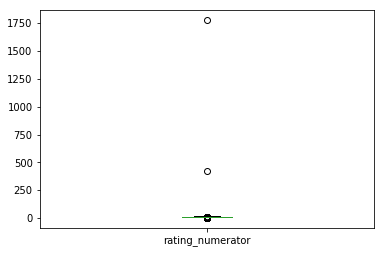

In [140]:
import matplotlib.pyplot as plt
twitter_archive_master.rating_numerator.plot.box()
plt.show()

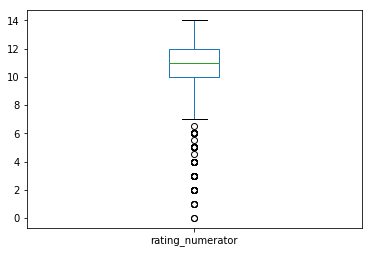

In [179]:
twitter_archive_master[twitter_archive_master.rating_numerator<=250].rating_numerator.plot.box()
plt.show()

狗的评级分子有2个异常大的值,剔除异常值箱线图如下：

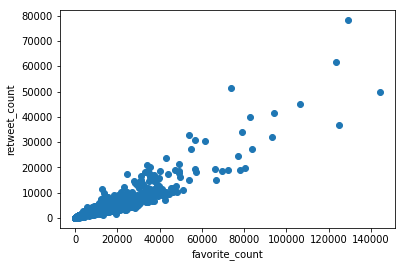

In [154]:
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.scatter(twitter_archive_master.favorite_count,twitter_archive_master.retweet_count) 
plt.show()

In [137]:
corr=twitter_archive_master.retweet_count.corr(twitter_archive_master.favorite_count)
corr

0.91703543344012994

In [150]:
rating_numerator_count=twitter_archive_master[twitter_archive_master.rating_numerator<=250].groupby('rating_numerator')['rating_numerator','favorite_count','retweet_count'].mean()

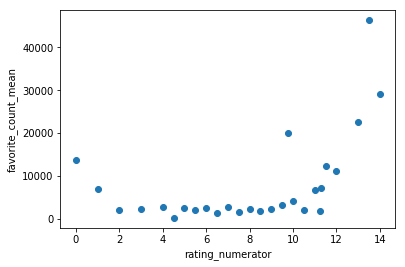

In [155]:
plt.xlabel('rating_numerator')
plt.ylabel('favorite_count_mean')
plt.scatter(rating_numerator_count.rating_numerator,rating_numerator_count.favorite_count) 
plt.show()

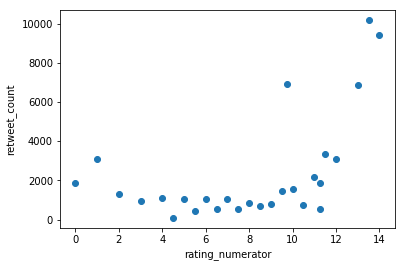

In [156]:
plt.xlabel('rating_numerator')
plt.ylabel('retweet_count')
plt.scatter(rating_numerator_count.rating_numerator,rating_numerator_count.retweet_count) 
plt.show()

retweet_count和favorite_count正相关   
评级分子越高的狗，被转发的数量越多   
评级分子越高的狗，被喜欢的数量越多   